In [4]:
# --- Import libraries
import nltk
import json
import re
import pandas as pd
from bs4 import BeautifulSoup
import os
from urllib.request import urlopen

In [5]:
# --- Define company list
response = urlopen('https://financialmodelingprep.com/api/v3/stock/list?apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
data=response.read().decode('utf-8')
raw_list=json.loads(data)
raw_list

[{'symbol': 'SPY',
  'name': 'SPDR S&P 500 ETF Trust',
  'price': 421.48,
  'exchange': 'New York Stock Exchange Arca'},
 {'symbol': 'CMCSA',
  'name': 'Comcast Corporation',
  'price': 57.115,
  'exchange': 'Nasdaq Global Select'},
 {'symbol': 'KMI',
  'name': 'Kinder Morgan, Inc.',
  'price': 18.868,
  'exchange': 'New York Stock Exchange'},
 {'symbol': 'INTC',
  'name': 'Intel Corporation',
  'price': 57.17,
  'exchange': 'Nasdaq Global Select'},
 {'symbol': 'MU',
  'name': 'Micron Technology, Inc.',
  'price': 80.92,
  'exchange': 'Nasdaq Global Select'},
 {'symbol': 'GDX',
  'name': 'VanEck Vectors Gold Miners ETF',
  'price': 36.965,
  'exchange': 'New York Stock Exchange Arca'},
 {'symbol': 'GE',
  'name': 'General Electric Company',
  'price': 13.4317,
  'exchange': 'New York Stock Exchange'},
 {'symbol': 'BAC',
  'name': 'Bank of America Corporation',
  'price': 41.8304,
  'exchange': 'New York Stock Exchange'},
 {'symbol': 'EEM',
  'name': 'iShares MSCI Emerging Markets ETF',

In [6]:
clean_list = [i['symbol'] for i in raw_list if i['exchange']=='Nasdaq Global Select']

In [7]:
len(clean_list)

2253

In [8]:
# --- Get all earnings call report
def get_jsonparsed_data(company,year):
    response = urlopen(f'https://financialmodelingprep.com/api/v4/batch_earning_call_transcript/{company}?year={year}&apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
    data = response.read().decode("utf-8")
    return json.loads(data)
AAPL = get_jsonparsed_data('AAPL',2020)

In [9]:
AAPL

[{'symbol': 'AAPL',
  'quarter': 1,
  'year': 2020,
  'date': '2020-01-29 17:00:00',
  'content': "Operator: Good day, everyone. Welcome to the Apple Incorporated First Quarter Fiscal Year 2020 Earnings Conference Call. Today's conference is being recorded.At this time for opening remarks and introductions, I would like to turn the call over to Tejas Gala, Senior Analyst, Corporate Finance and Investor Relations. Please go ahead.\nTejas Gala: Thank you. Good afternoon, and thank you for joining us. Speaking first today is Apple's CEO, Tim Cook, and he'll be followed by CFO, Luca Maestri. After that, we'll open the call to questions from analysts.Please note that some of the information you'll hear during our discussion today will consist of forward-looking statements, including without limitation, those regarding revenue, gross margin, operating expenses, other income and expenses, taxes, capital allocation and future business outlook. Actual results or trends could differ materially f

In [17]:
n = 0
earnings_call = []
for i in clean_list:
    try:
        earnings_call.append(get_jsonparsed_data(i,2019))
        earnings_call.append(get_jsonparsed_data(i,2020))
        n += 1
        print(f'Successfully download report for {i}. It is the no. {n} report.')
    except:
        print(f'Cannot return report for {i}.')
        pass
with open('earnings_call.txt', 'w') as outfile:
    json.dump(earnings_call, outfile)
print(f'Successfully download {n} reports.')

Successfully download report for CMCSA. It is the no. 1 report.
Successfully download report for INTC. It is the no. 2 report.
Successfully download report for MU. It is the no. 3 report.
Successfully download report for AAPL. It is the no. 4 report.
Successfully download report for MSFT. It is the no. 5 report.
Successfully download report for SIRI. It is the no. 6 report.
Successfully download report for CZR. It is the no. 7 report.
Successfully download report for FB. It is the no. 8 report.
Successfully download report for GSM. It is the no. 9 report.
Successfully download report for JD. It is the no. 10 report.
Successfully download report for AVGO. It is the no. 11 report.
Successfully download report for AMAT. It is the no. 12 report.
Successfully download report for ZNGA. It is the no. 13 report.
Successfully download report for QCOM. It is the no. 14 report.
Successfully download report for CSCO. It is the no. 15 report.
Successfully download report for GRPN. It is the no. 16 

Successfully download report for GT. It is the no. 130 report.
Successfully download report for EA. It is the no. 131 report.
Successfully download report for GPRO. It is the no. 132 report.
Successfully download report for VRTX. It is the no. 133 report.
Successfully download report for YY. It is the no. 134 report.
Successfully download report for FWONK. It is the no. 135 report.
Successfully download report for HOMB. It is the no. 136 report.
Successfully download report for NKTR. It is the no. 137 report.
Successfully download report for CERN. It is the no. 138 report.
Successfully download report for AKAM. It is the no. 139 report.
Successfully download report for CDNS. It is the no. 140 report.
Successfully download report for MDRX. It is the no. 141 report.
Successfully download report for ISBC. It is the no. 142 report.
Successfully download report for NTAP. It is the no. 143 report.
Successfully download report for BBBY. It is the no. 144 report.
Successfully download report f

Successfully download report for SEIC. It is the no. 257 report.
Successfully download report for FORM. It is the no. 258 report.
Successfully download report for BRKS. It is the no. 259 report.
Successfully download report for HTHT. It is the no. 260 report.
Successfully download report for PENN. It is the no. 261 report.
Successfully download report for IONS. It is the no. 262 report.
Successfully download report for KRNY. It is the no. 263 report.
Successfully download report for SBAC. It is the no. 264 report.
Successfully download report for BGNE. It is the no. 265 report.
Successfully download report for WB. It is the no. 266 report.
Successfully download report for THRM. It is the no. 267 report.
Successfully download report for UMPQ. It is the no. 268 report.
Successfully download report for PNFP. It is the no. 269 report.
Successfully download report for GLPI. It is the no. 270 report.
Successfully download report for CBOE. It is the no. 271 report.
Successfully download repor

Successfully download report for KURA. It is the no. 384 report.
Successfully download report for GTHX. It is the no. 385 report.
Successfully download report for GPRE. It is the no. 386 report.
Successfully download report for HIBB. It is the no. 387 report.
Successfully download report for ALGN. It is the no. 388 report.
Successfully download report for LGIH. It is the no. 389 report.
Successfully download report for REG. It is the no. 390 report.
Successfully download report for NUVA. It is the no. 391 report.
Successfully download report for SWIR. It is the no. 392 report.
Successfully download report for ARAY. It is the no. 393 report.
Successfully download report for HTLD. It is the no. 394 report.
Successfully download report for VRNS. It is the no. 395 report.
Successfully download report for CINF. It is the no. 396 report.
Successfully download report for GLRE. It is the no. 397 report.
Successfully download report for RRR. It is the no. 398 report.
Successfully download repor

Successfully download report for HSII. It is the no. 511 report.
Successfully download report for LOPE. It is the no. 512 report.
Successfully download report for SMTC. It is the no. 513 report.
Successfully download report for SCHN. It is the no. 514 report.
Successfully download report for HSON. It is the no. 515 report.
Successfully download report for UBSI. It is the no. 516 report.
Successfully download report for FPRX. It is the no. 517 report.
Successfully download report for SMCI. It is the no. 518 report.
Successfully download report for ODFL. It is the no. 519 report.
Successfully download report for CFMS. It is the no. 520 report.
Successfully download report for WLTW. It is the no. 521 report.
Successfully download report for CDXS. It is the no. 522 report.
Successfully download report for FCFS. It is the no. 523 report.
Successfully download report for VREX. It is the no. 524 report.
Successfully download report for LSXMK. It is the no. 525 report.
Successfully download re

Successfully download report for MGLN. It is the no. 638 report.
Successfully download report for EDIT. It is the no. 639 report.
Successfully download report for PRGS. It is the no. 640 report.
Successfully download report for TRMK. It is the no. 641 report.
Successfully download report for ACRS. It is the no. 642 report.
Successfully download report for SPSC. It is the no. 643 report.
Successfully download report for EFSC. It is the no. 644 report.
Successfully download report for BOKF. It is the no. 645 report.
Successfully download report for PSMT. It is the no. 646 report.
Successfully download report for UVSP. It is the no. 647 report.
Successfully download report for OCFC. It is the no. 648 report.
Successfully download report for GOGL. It is the no. 649 report.
Successfully download report for CCRN. It is the no. 650 report.
Successfully download report for IRTC. It is the no. 651 report.
Successfully download report for TA. It is the no. 652 report.
Successfully download repor

Successfully download report for FELE. It is the no. 765 report.
Successfully download report for SSB. It is the no. 766 report.
Successfully download report for ITRN. It is the no. 767 report.
Successfully download report for LANC. It is the no. 768 report.
Successfully download report for CHDN. It is the no. 769 report.
Successfully download report for ENTA. It is the no. 770 report.
Successfully download report for EXPO. It is the no. 771 report.
Successfully download report for FRGI. It is the no. 772 report.
Successfully download report for DAKT. It is the no. 773 report.
Successfully download report for AAON. It is the no. 774 report.
Successfully download report for FLDM. It is the no. 775 report.
Successfully download report for TCBK. It is the no. 776 report.
Successfully download report for SNDX. It is the no. 777 report.
Successfully download report for INGN. It is the no. 778 report.
Successfully download report for GSBC. It is the no. 779 report.
Successfully download repo

Successfully download report for OFIX. It is the no. 892 report.
Successfully download report for KVHI. It is the no. 893 report.
Successfully download report for ARCB. It is the no. 894 report.
Successfully download report for WABC. It is the no. 895 report.
Successfully download report for CNBKA. It is the no. 896 report.
Successfully download report for CCXI. It is the no. 897 report.
Successfully download report for UBFO. It is the no. 898 report.
Successfully download report for CNXN. It is the no. 899 report.
Successfully download report for HAYN. It is the no. 900 report.
Successfully download report for CAC. It is the no. 901 report.
Successfully download report for NATH. It is the no. 902 report.
Successfully download report for ANDE. It is the no. 903 report.
Successfully download report for GOOD. It is the no. 904 report.
Successfully download report for AMRK. It is the no. 905 report.
Successfully download report for CCD. It is the no. 906 report.
Successfully download repo

Successfully download report for MGEE. It is the no. 1018 report.
Successfully download report for CVCO. It is the no. 1019 report.
Successfully download report for SP. It is the no. 1020 report.
Successfully download report for STBA. It is the no. 1021 report.
Successfully download report for TBNK. It is the no. 1022 report.
Successfully download report for BFIN. It is the no. 1023 report.
Successfully download report for ACGLP. It is the no. 1024 report.
Successfully download report for CBTX. It is the no. 1025 report.
Successfully download report for CIGI. It is the no. 1026 report.
Successfully download report for IOSP. It is the no. 1027 report.
Successfully download report for OVID. It is the no. 1028 report.
Successfully download report for PCTI. It is the no. 1029 report.
Successfully download report for RBCAA. It is the no. 1030 report.
Successfully download report for SUNS. It is the no. 1031 report.
Successfully download report for CCBG. It is the no. 1032 report.
Successful

Successfully download report for FITBI. It is the no. 1142 report.
Successfully download report for FORTY. It is the no. 1143 report.
Successfully download report for FUNC. It is the no. 1144 report.
Successfully download report for FUND. It is the no. 1145 report.
Successfully download report for GAINM. It is the no. 1146 report.
Successfully download report for GAINN. It is the no. 1147 report.
Successfully download report for GBLIL. It is the no. 1148 report.
Successfully download report for GILT. It is the no. 1149 report.
Successfully download report for GMLPP. It is the no. 1150 report.
Successfully download report for GNTY. It is the no. 1151 report.
Successfully download report for GOODM. It is the no. 1152 report.
Successfully download report for GSIT. It is the no. 1153 report.
Successfully download report for HBANN. It is the no. 1154 report.
Successfully download report for HBCP. It is the no. 1155 report.
Successfully download report for HRZN. It is the no. 1156 report.
Su

Successfully download report for EQ. It is the no. 1266 report.
Successfully download report for EDRY. It is the no. 1267 report.
Successfully download report for EVLO. It is the no. 1268 report.
Successfully download report for EVOP. It is the no. 1269 report.
Successfully download report for XCUR. It is the no. 1270 report.
Successfully download report for FITBP. It is the no. 1271 report.
Successfully download report for DVOL. It is the no. 1272 report.
Successfully download report for DALI. It is the no. 1273 report.
Successfully download report for MYFW. It is the no. 1274 report.
Successfully download report for FOCS. It is the no. 1275 report.
Successfully download report for FTDR. It is the no. 1276 report.
Successfully download report for GNFT. It is the no. 1277 report.
Successfully download report for GMAB. It is the no. 1278 report.
Successfully download report for GAINL. It is the no. 1279 report.
Successfully download report for DRIV. It is the no. 1280 report.
Successful

Successfully download report for STND. It is the no. 1391 report.
Successfully download report for STOK. It is the no. 1392 report.
Successfully download report for STNE. It is the no. 1393 report.
Successfully download report for SNDL. It is the no. 1394 report.
Successfully download report for SLGG. It is the no. 1395 report.
Successfully download report for SURF. It is the no. 1396 report.
Successfully download report for STRO. It is the no. 1397 report.
Successfully download report for SSSS. It is the no. 1398 report.
Successfully download report for SVMK. It is the no. 1399 report.
Successfully download report for TRNX. It is the no. 1400 report.
Successfully download report for TCFCP. It is the no. 1401 report.
Successfully download report for TCRR. It is the no. 1402 report.
Successfully download report for TENB. It is the no. 1403 report.
Successfully download report for BPRN. It is the no. 1404 report.
Successfully download report for REAL. It is the no. 1405 report.
Successfu

Successfully download report for DHCNL. It is the no. 1516 report.
Successfully download report for OYST. It is the no. 1517 report.
Successfully download report for VIR. It is the no. 1518 report.
Successfully download report for ZIONN. It is the no. 1519 report.
Successfully download report for ZIONO. It is the no. 1520 report.
Successfully download report for YGYIP. It is the no. 1521 report.
Successfully download report for LDEM. It is the no. 1522 report.
Successfully download report for MDIA. It is the no. 1523 report.
Successfully download report for POTX. It is the no. 1524 report.
Successfully download report for SRACU. It is the no. 1525 report.
Successfully download report for GXTG. It is the no. 1526 report.
Successfully download report for HTIA. It is the no. 1527 report.
Successfully download report for SITM. It is the no. 1528 report.
Successfully download report for LATNU. It is the no. 1529 report.
Successfully download report for MOHO. It is the no. 1530 report.
Succe

Successfully download report for LEGN. It is the no. 1640 report.
Successfully download report for PNFPP. It is the no. 1641 report.
Successfully download report for DADA. It is the no. 1642 report.
Successfully download report for PLRX. It is the no. 1643 report.
Successfully download report for CALT. It is the no. 1644 report.
Successfully download report for AMTI. It is the no. 1645 report.
Successfully download report for ZI. It is the no. 1646 report.
Successfully download report for FBCG. It is the no. 1647 report.
Successfully download report for FBCV. It is the no. 1648 report.
Successfully download report for VRM. It is the no. 1649 report.
Successfully download report for HECCU. It is the no. 1650 report.
Successfully download report for FMBIP. It is the no. 1651 report.
Successfully download report for LPRO. It is the no. 1652 report.
Successfully download report for AUBAP. It is the no. 1653 report.
Successfully download report for LTRN. It is the no. 1654 report.
Successfu

Successfully download report for TRIT. It is the no. 1764 report.
Successfully download report for TTCF. It is the no. 1765 report.
Successfully download report for TWCT. It is the no. 1766 report.
Successfully download report for VACQ. It is the no. 1767 report.
Successfully download report for VIH. It is the no. 1768 report.
Successfully download report for VLDR. It is the no. 1769 report.
Successfully download report for VTRS. It is the no. 1770 report.
Successfully download report for KNTE. It is the no. 1771 report.
Successfully download report for SEER. It is the no. 1772 report.
Successfully download report for SGTX. It is the no. 1773 report.
Successfully download report for YQ. It is the no. 1774 report.
Successfully download report for FLACU. It is the no. 1775 report.
Successfully download report for ABNB. It is the no. 1776 report.
Successfully download report for CTAQU. It is the no. 1777 report.
Successfully download report for NEBCU. It is the no. 1778 report.
Successful

Successfully download report for SHLS. It is the no. 1888 report.
Successfully download report for TLMDW. It is the no. 1889 report.
Successfully download report for TOMZ. It is the no. 1890 report.
Successfully download report for TVACU. It is the no. 1891 report.
Successfully download report for VMAC. It is the no. 1892 report.
Successfully download report for VMAR. It is the no. 1893 report.
Successfully download report for ZNTEU. It is the no. 1894 report.
Successfully download report for EZGO. It is the no. 1895 report.
Successfully download report for DHHCU. It is the no. 1896 report.
Successfully download report for SSAAU. It is the no. 1897 report.
Successfully download report for ITHXU. It is the no. 1898 report.
Successfully download report for CTAQW. It is the no. 1899 report.
Successfully download report for SNRHW. It is the no. 1900 report.
Successfully download report for GHVI. It is the no. 1901 report.
Successfully download report for SNRH. It is the no. 1902 report.
Su

Successfully download report for LJAQW. It is the no. 2012 report.
Successfully download report for LJAQ. It is the no. 2013 report.
Successfully download report for IMCC. It is the no. 2014 report.
Successfully download report for BLTSW. It is the no. 2015 report.
Successfully download report for EAC. It is the no. 2016 report.
Successfully download report for PACXW. It is the no. 2017 report.
Successfully download report for INKA. It is the no. 2018 report.
Successfully download report for PACX. It is the no. 2019 report.
Successfully download report for INKAW. It is the no. 2020 report.
Successfully download report for GSAQ. It is the no. 2021 report.
Successfully download report for GSAQW. It is the no. 2022 report.
Successfully download report for POWRW. It is the no. 2023 report.
Successfully download report for ANZUU. It is the no. 2024 report.
Successfully download report for PSAGU. It is the no. 2025 report.
Successfully download report for INNV. It is the no. 2026 report.
Suc

Successfully download report for DCRCU. It is the no. 2136 report.
Successfully download report for CRZNU. It is the no. 2137 report.
Successfully download report for ALPAU. It is the no. 2138 report.
Successfully download report for OLK. It is the no. 2139 report.
Successfully download report for WMPN. It is the no. 2140 report.
Successfully download report for DSEY. It is the no. 2141 report.
Successfully download report for EEIQ. It is the no. 2142 report.
Successfully download report for MSDAU. It is the no. 2143 report.
Successfully download report for CRCT. It is the no. 2144 report.
Successfully download report for LVTX. It is the no. 2145 report.
Successfully download report for EWTX. It is the no. 2146 report.
Successfully download report for IKNA. It is the no. 2147 report.
Successfully download report for ALHC. It is the no. 2148 report.
Successfully download report for HYW. It is the no. 2149 report.
Successfully download report for DSGN. It is the no. 2150 report.
Successf

In [78]:
f = open('earnings_call.txt')
data = json.load(f)
data[0]

[{'symbol': 'CMCSA',
  'quarter': 1,
  'year': 2019,
  'date': '2019-04-25 17:00:00',
  'content': "Operator: Good morning ladies and gentlemen and welcome to Comcast’s First Quarter 2019 Earnings Conference Call. [Operator Instructions] Please note that this conference call is being recorded. I will now turn the call over to Senior Vice President, Investor Relations and Finance, Mr. Jason Armstrong. Please go ahead Mr. Armstrong.\nJason Armstrong: Thank you, operator. And welcome, everyone. Joining me on this morning's call are Brian Roberts, Mike Cavanagh, Steve Burke, Dave Watson and Jeremy Darroch. Brian and Mike will make formal remarks, and Steve, Dave and Jeremy will also be available for Q&A. As always, let me now refer you to Slide Number 2, which contains our safe harbor disclaimer, and remind you that this conference call may include forward-looking statements subject to certain risks and uncertainties. In addition, in this call, we will refer to certain non-GAAP financial m

In [79]:
list_full = []
for i in data:
    for j in i:
        if j['quarter']==4:
            list_full.append(j)
        else:
            pass
list_full[0]

{'symbol': 'CMCSA',
 'quarter': 4,
 'year': 2019,
 'date': '2020-01-23 12:04:23',
 'content': "Operator: Good morning, ladies and gentlemen, and welcome to Comcast's Fourth Quarter and Full Year 2019 Earnings Conference Call. At this time, all participants are in a listen-only mode. Please note that this conference call is being recorded. I will now turn the call over to Senior Vice President, Investor Relations and Finance, Mr. Jason Armstrong. Please go ahead, Mr. Armstrong.\nJason Armstrong: Thank you, operator, and welcome everyone. Joining me on this morning's call are Brian Roberts, Mike Cavanagh, Steve Burke, Dave Watson, and Jeremy Darroch. Brian and Mike will make formal remarks; and Steve, Dave, and Jeremy will also be available for Q&A. As always, let me now refer you to slide number 2 which contains our Safe Harbor disclaimer and remind you that this conference call may include forward-looking statements subject to certain risks and uncertainties. In addition, in this call,

In [142]:
full = pd.DataFrame(list_full)
full

,symbol,quarter,year,date,content
0,CMCSA,4,2019,2020-01-23 12:04:23,"Operator: Good morning, ladies and gentlemen, ..."
1,CMCSA,4,2020,2021-01-28 14:31:06,"Operator: Good morning, ladies and gentlemen, ..."
2,INTC,4,2019,2020-01-24 17:00:00,"Operator: Ladies and gentlemen, thank you for ..."
3,INTC,4,2020,2021-01-22 00:58:06,"Operator: Ladies and gentlemen, thank you for ..."
4,MU,4,2019,2019-09-27 17:00:00,"Operator: Good afternoon. My name is Sherry, a..."
...,...,...,...,...,...
2237,CNXC,4,2020,2021-01-12 12:35:03,"Operator: Ladies and gentlemen, thank you for ..."
2238,PLBY,4,2020,2021-03-23 18:40:09,Operator: Thank you for standing by. And welco...
2239,CLOV,4,2020,2021-03-01 22:17:05,"Operator: Ladies and gentlemen, thank you for ..."
2240,AXON,4,2020,2021-02-25 23:08:03,"Andrea James: Hello, everyone. Welcome to Axon..."


In [143]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

def word_preprocess(n):
    # --- Remove separaters
    n = re.sub(r'\n', '', n)
    n = re.sub(r'--','', n)
    # --- Remove stopword
    stop_words = set(stopwords.words('english')+list(punctuation))
    words_token = [w for w in word_tokenize(n) if not w.lower() in stop_words]
    filtered_sentence = [i for i in words_token if i not in stop_words]
    # --- Lemmatize
    lemmatizer = WordNetLemmatizer()
    clean_list = ",".join([lemmatizer.lemmatize(i) for i in filtered_sentence])
    return clean_list

In [144]:
full['content_clean'] = full['content'].apply(word_preprocess)

In [145]:
full['code']=full['symbol']+full['year'].astype(str)
full=full[['code','content','content_clean']]
full.head()

,code,content,content_clean
0,CMCSA2019,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C..."
1,CMCSA2020,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C..."
2,INTC2019,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco..."
3,INTC2020,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco..."
4,MU2019,"Operator: Good afternoon. My name is Sherry, a...","Operator,Good,afternoon,name,Sherry,conference..."


In [146]:
full.to_csv('full.csv')

In [189]:
# --- Get financial ratios: growth figures
def get_jsonparsed_data_ratio(company):
    response = urlopen(f'https://financialmodelingprep.com/api/v3/financial-growth/{company}?limit=20&apikey=f33b3631d5140a4f1c87e7f2eafd8fdd')
    data = response.read().decode("utf-8")
    return json.loads(data)
AAPL = get_jsonparsed_data_ratio('AAPL')
AAPL

[{'symbol': 'AAPL',
  'date': '2020-09-26',
  'period': 'FY',
  'revenueGrowth': 0.055120803769784836,
  'grossProfitGrowth': 0.06671274087324172,
  'ebitgrowth': 0.03688409197559831,
  'operatingIncomeGrowth': 0.03688409197559831,
  'netIncomeGrowth': 0.039000289561314606,
  'epsgrowth': 0.10609857978279026,
  'epsdilutedGrowth': 0.10344827586206885,
  'weightedAverageSharesGrowth': -0.06059209794028975,
  'weightedAverageSharesDilutedGrowth': -0.057402558404513054,
  'dividendsperShareGrowth': 0.06163530142054705,
  'operatingCashFlowGrowth': 0.16260033721952413,
  'freeCashFlowGrowth': 0.24567033414832926,
  'tenYRevenueGrowthPerShare': 5.176487778422401,
  'fiveYRevenueGrowthPerShare': 0.5578051009598138,
  'threeYRevenueGrowthPerShare': 0.4402421047629735,
  'tenYOperatingCFGrowthPerShare': 5.366884949754451,
  'fiveYOperatingCFGrowthPerShare': 0.3166135946632342,
  'threeYOperatingCFGrowthPerShare': 0.5255926515521804,
  'tenYNetIncomeGrowthPerShare': 5.012479154723281,
  'fiveYN

In [194]:
n = 0
ratio = []
for i in clean_list:
    try:
        ratio.append(get_jsonparsed_data_ratio(i))
        n += 1
        print(f'Successfully download ratio for {i}. It is the no. {n} report.')
    except:
        print(f'Cannot return ratio for {i}.')
        pass
with open('ratio.txt', 'w') as outfile:
    json.dump(ratio, outfile)
print(f'Successfully download {n} reports.')

Successfully download ratio for CMCSA. It is the no. 1 report.
Successfully download ratio for INTC. It is the no. 2 report.
Successfully download ratio for MU. It is the no. 3 report.
Successfully download ratio for AAPL. It is the no. 4 report.
Successfully download ratio for MSFT. It is the no. 5 report.
Successfully download ratio for SIRI. It is the no. 6 report.
Successfully download ratio for CZR. It is the no. 7 report.
Successfully download ratio for FB. It is the no. 8 report.
Successfully download ratio for GSM. It is the no. 9 report.
Successfully download ratio for JD. It is the no. 10 report.
Successfully download ratio for AVGO. It is the no. 11 report.
Successfully download ratio for AMAT. It is the no. 12 report.
Successfully download ratio for ZNGA. It is the no. 13 report.
Successfully download ratio for QCOM. It is the no. 14 report.
Successfully download ratio for CSCO. It is the no. 15 report.
Successfully download ratio for GRPN. It is the no. 16 report.
Successf

Successfully download ratio for GPRO. It is the no. 132 report.
Successfully download ratio for VRTX. It is the no. 133 report.
Successfully download ratio for YY. It is the no. 134 report.
Successfully download ratio for FWONK. It is the no. 135 report.
Successfully download ratio for HOMB. It is the no. 136 report.
Successfully download ratio for NKTR. It is the no. 137 report.
Successfully download ratio for CERN. It is the no. 138 report.
Successfully download ratio for AKAM. It is the no. 139 report.
Successfully download ratio for CDNS. It is the no. 140 report.
Successfully download ratio for MDRX. It is the no. 141 report.
Successfully download ratio for ISBC. It is the no. 142 report.
Successfully download ratio for NTAP. It is the no. 143 report.
Successfully download ratio for BBBY. It is the no. 144 report.
Successfully download ratio for MAR. It is the no. 145 report.
Successfully download ratio for VIAV. It is the no. 146 report.
Successfully download ratio for SHOO. It i

Successfully download ratio for PENN. It is the no. 261 report.
Successfully download ratio for IONS. It is the no. 262 report.
Successfully download ratio for KRNY. It is the no. 263 report.
Successfully download ratio for SBAC. It is the no. 264 report.
Successfully download ratio for BGNE. It is the no. 265 report.
Successfully download ratio for WB. It is the no. 266 report.
Successfully download ratio for THRM. It is the no. 267 report.
Successfully download ratio for UMPQ. It is the no. 268 report.
Successfully download ratio for PNFP. It is the no. 269 report.
Successfully download ratio for GLPI. It is the no. 270 report.
Successfully download ratio for CBOE. It is the no. 271 report.
Successfully download ratio for LITE. It is the no. 272 report.
Successfully download ratio for STAY. It is the no. 273 report.
Successfully download ratio for TCF. It is the no. 274 report.
Successfully download ratio for ROST. It is the no. 275 report.
Successfully download ratio for PCRX. It is

Successfully download ratio for REG. It is the no. 390 report.
Successfully download ratio for NUVA. It is the no. 391 report.
Successfully download ratio for SWIR. It is the no. 392 report.
Successfully download ratio for ARAY. It is the no. 393 report.
Successfully download ratio for HTLD. It is the no. 394 report.
Successfully download ratio for VRNS. It is the no. 395 report.
Successfully download ratio for CINF. It is the no. 396 report.
Successfully download ratio for GLRE. It is the no. 397 report.
Successfully download ratio for RRR. It is the no. 398 report.
Successfully download ratio for PRAH. It is the no. 399 report.
Successfully download ratio for ZG. It is the no. 400 report.
Successfully download ratio for FTNT. It is the no. 401 report.
Successfully download ratio for CLDX. It is the no. 402 report.
Successfully download ratio for MDCA. It is the no. 403 report.
Successfully download ratio for SRCL. It is the no. 404 report.
Successfully download ratio for RBBN. It is 

Successfully download ratio for ODFL. It is the no. 519 report.
Successfully download ratio for CFMS. It is the no. 520 report.
Successfully download ratio for WLTW. It is the no. 521 report.
Successfully download ratio for CDXS. It is the no. 522 report.
Successfully download ratio for FCFS. It is the no. 523 report.
Successfully download ratio for VREX. It is the no. 524 report.
Successfully download ratio for LSXMK. It is the no. 525 report.
Successfully download ratio for MSTR. It is the no. 526 report.
Successfully download ratio for COHU. It is the no. 527 report.
Successfully download ratio for OTIC. It is the no. 528 report.
Successfully download ratio for GRMN. It is the no. 529 report.
Successfully download ratio for MEDP. It is the no. 530 report.
Successfully download ratio for TWOU. It is the no. 531 report.
Successfully download ratio for ACTG. It is the no. 532 report.
Successfully download ratio for AMWD. It is the no. 533 report.
Successfully download ratio for CATY. I

Successfully download ratio for OCFC. It is the no. 648 report.
Successfully download ratio for GOGL. It is the no. 649 report.
Successfully download ratio for CCRN. It is the no. 650 report.
Successfully download ratio for IRTC. It is the no. 651 report.
Successfully download ratio for TA. It is the no. 652 report.
Successfully download ratio for FRTA. It is the no. 653 report.
Successfully download ratio for PI. It is the no. 654 report.
Successfully download ratio for MNRO. It is the no. 655 report.
Successfully download ratio for FMBI. It is the no. 656 report.
Successfully download ratio for ACLS. It is the no. 657 report.
Successfully download ratio for ITCI. It is the no. 658 report.
Successfully download ratio for VIVO. It is the no. 659 report.
Successfully download ratio for MCHX. It is the no. 660 report.
Successfully download ratio for CRAI. It is the no. 661 report.
Successfully download ratio for DSGX. It is the no. 662 report.
Successfully download ratio for HCM. It is t

Successfully download ratio for SNDX. It is the no. 777 report.
Successfully download ratio for INGN. It is the no. 778 report.
Successfully download ratio for GSBC. It is the no. 779 report.
Successfully download ratio for LQDT. It is the no. 780 report.
Successfully download ratio for PBPB. It is the no. 781 report.
Successfully download ratio for AVAV. It is the no. 782 report.
Successfully download ratio for IPGP. It is the no. 783 report.
Successfully download ratio for AMPH. It is the no. 784 report.
Successfully download ratio for NDLS. It is the no. 785 report.
Successfully download ratio for ABCB. It is the no. 786 report.
Successfully download ratio for CYTK. It is the no. 787 report.
Successfully download ratio for NTGR. It is the no. 788 report.
Successfully download ratio for RDWR. It is the no. 789 report.
Successfully download ratio for GIFI. It is the no. 790 report.
Successfully download ratio for CACC. It is the no. 791 report.
Successfully download ratio for OSIS. It

Successfully download ratio for CCD. It is the no. 906 report.
Successfully download ratio for DGII. It is the no. 907 report.
Successfully download ratio for VLGEA. It is the no. 908 report.
Successfully download ratio for WRLD. It is the no. 909 report.
Successfully download ratio for SYBT. It is the no. 910 report.
Successfully download ratio for HWKN. It is the no. 911 report.
Successfully download ratio for CHY. It is the no. 912 report.
Successfully download ratio for CEVA. It is the no. 913 report.
Successfully download ratio for HCCI. It is the no. 914 report.
Successfully download ratio for ILPT. It is the no. 915 report.
Successfully download ratio for CHW. It is the no. 916 report.
Successfully download ratio for CHCO. It is the no. 917 report.
Successfully download ratio for IBCP. It is the no. 918 report.
Successfully download ratio for MBWM. It is the no. 919 report.
Successfully download ratio for RCKY. It is the no. 920 report.
Successfully download ratio for POWI. It i

Successfully download ratio for ESSA. It is the no. 1034 report.
Successfully download ratio for FFNW. It is the no. 1035 report.
Successfully download ratio for FCNCA. It is the no. 1036 report.
Successfully download ratio for XONE. It is the no. 1037 report.
Successfully download ratio for WTBA. It is the no. 1038 report.
Successfully download ratio for ULH. It is the no. 1039 report.
Successfully download ratio for AROW. It is the no. 1040 report.
Successfully download ratio for BANF. It is the no. 1041 report.
Successfully download ratio for BELFB. It is the no. 1042 report.
Successfully download ratio for CHMG. It is the no. 1043 report.
Successfully download ratio for CPIX. It is the no. 1044 report.
Successfully download ratio for CSTR. It is the no. 1045 report.
Successfully download ratio for ESLT. It is the no. 1046 report.
Successfully download ratio for GASS. It is the no. 1047 report.
Successfully download ratio for GBLI. It is the no. 1048 report.
Successfully download ra

Successfully download ratio for IGLD. It is the no. 1160 report.
Successfully download ratio for INBKL. It is the no. 1161 report.
Successfully download ratio for ISSC. It is the no. 1162 report.
Successfully download ratio for JSM. It is the no. 1163 report.
Successfully download ratio for KCAPL. It is the no. 1164 report.
Successfully download ratio for KELYB. It is the no. 1165 report.
Successfully download ratio for KMDA. It is the no. 1166 report.
Successfully download ratio for LAWS. It is the no. 1167 report.
Successfully download ratio for LBTYB. It is the no. 1168 report.
Successfully download ratio for LINC. It is the no. 1169 report.
Successfully download ratio for LSXMB. It is the no. 1170 report.
Successfully download ratio for LTRPB. It is the no. 1171 report.
Successfully download ratio for MESO. It is the no. 1172 report.
Successfully download ratio for MFINL. It is the no. 1173 report.
Successfully download ratio for MINDP. It is the no. 1174 report.
Successfully downl

Successfully download ratio for GRTS. It is the no. 1286 report.
Successfully download ratio for GO. It is the no. 1287 report.
Successfully download ratio for GH. It is the no. 1288 report.
Successfully download ratio for HWC. It is the no. 1289 report.
Successfully download ratio for HARP. It is the no. 1290 report.
Successfully download ratio for HHR. It is the no. 1291 report.
Successfully download ratio for HCAT. It is the no. 1292 report.
Successfully download ratio for HLIO. It is the no. 1293 report.
Successfully download ratio for FIXX. It is the no. 1294 report.
Successfully download ratio for HOOK. It is the no. 1295 report.
Successfully download ratio for IIIV. It is the no. 1296 report.
Successfully download ratio for IDYA. It is the no. 1297 report.
Successfully download ratio for IHRT. It is the no. 1298 report.
Successfully download ratio for INMD. It is the no. 1299 report.
Successfully download ratio for IPLDP. It is the no. 1300 report.
Successfully download ratio fo

Successfully download ratio for BROG. It is the no. 1413 report.
Successfully download ratio for TWST. It is the no. 1414 report.
Successfully download ratio for UBX. It is the no. 1415 report.
Successfully download ratio for TIGR. It is the no. 1416 report.
Successfully download ratio for UPWK. It is the no. 1417 report.
Successfully download ratio for UROV. It is the no. 1418 report.
Successfully download ratio for UXIN. It is the no. 1419 report.
Successfully download ratio for VLYPO. It is the no. 1420 report.
Successfully download ratio for VLYPP. It is the no. 1421 report.
Successfully download ratio for VIOT. It is the no. 1422 report.
Successfully download ratio for HLAL. It is the no. 1423 report.
Successfully download ratio for WTRH. It is the no. 1424 report.
Successfully download ratio for WTRE. It is the no. 1425 report.
Successfully download ratio for WTREP. It is the no. 1426 report.
Successfully download ratio for WW. It is the no. 1427 report.
Successfully download rat

Successfully download ratio for BHFAL. It is the no. 1540 report.
Successfully download ratio for COWNL. It is the no. 1541 report.
Successfully download ratio for CHNGU. It is the no. 1542 report.
Successfully download ratio for MEDS. It is the no. 1543 report.
Successfully download ratio for DCOMP. It is the no. 1544 report.
Successfully download ratio for MFH. It is the no. 1545 report.
Successfully download ratio for GRIL. It is the no. 1546 report.
Successfully download ratio for HWCPL. It is the no. 1547 report.
Successfully download ratio for FDUSZ. It is the no. 1548 report.
Successfully download ratio for CMFNL. It is the no. 1549 report.
Successfully download ratio for OFSSZ. It is the no. 1550 report.
Successfully download ratio for INBKZ. It is the no. 1551 report.
Successfully download ratio for OFSSL. It is the no. 1552 report.
Successfully download ratio for PTMN. It is the no. 1553 report.
Successfully download ratio for TANNZ. It is the no. 1554 report.
Successfully do

Successfully download ratio for LGHL. It is the no. 1666 report.
Successfully download ratio for RPTX. It is the no. 1667 report.
Successfully download ratio for GTH. It is the no. 1668 report.
Successfully download ratio for PFC. It is the no. 1669 report.
Successfully download ratio for FJUN. It is the no. 1670 report.
Successfully download ratio for DJUN. It is the no. 1671 report.
Successfully download ratio for BRLIU. It is the no. 1672 report.
Successfully download ratio for CEFA. It is the no. 1673 report.
Successfully download ratio for TBKCP. It is the no. 1674 report.
Successfully download ratio for OPINL. It is the no. 1675 report.
Successfully download ratio for AKUS. It is the no. 1676 report.
Successfully download ratio for PYPD. It is the no. 1677 report.
Successfully download ratio for API. It is the no. 1678 report.
Successfully download ratio for FREEW. It is the no. 1679 report.
Successfully download ratio for FUSN. It is the no. 1680 report.
Successfully download ra

Successfully download ratio for SCOAU. It is the no. 1792 report.
Successfully download ratio for VIRI. It is the no. 1793 report.
Successfully download ratio for MTACU. It is the no. 1794 report.
Successfully download ratio for ACKIU. It is the no. 1795 report.
Successfully download ratio for IKT. It is the no. 1796 report.
Successfully download ratio for GBS. It is the no. 1797 report.
Successfully download ratio for HCARU. It is the no. 1798 report.
Successfully download ratio for PHAR. It is the no. 1799 report.
Successfully download ratio for MRM. It is the no. 1800 report.
Successfully download ratio for OPEN. It is the no. 1801 report.
Successfully download ratio for AKICU. It is the no. 1802 report.
Successfully download ratio for PPGHU. It is the no. 1803 report.
Successfully download ratio for OMEG. It is the no. 1804 report.
Successfully download ratio for KAIRU. It is the no. 1805 report.
Successfully download ratio for MCADU. It is the no. 1806 report.
Successfully downloa

Successfully download ratio for CHKEZ. It is the no. 1918 report.
Successfully download ratio for CHKEW. It is the no. 1919 report.
Successfully download ratio for XPDIU. It is the no. 1920 report.
Successfully download ratio for SCOBU. It is the no. 1921 report.
Successfully download ratio for SVOK. It is the no. 1922 report.
Successfully download ratio for FOREU. It is the no. 1923 report.
Successfully download ratio for PMGMU. It is the no. 1924 report.
Successfully download ratio for PGRWU. It is the no. 1925 report.
Successfully download ratio for BLUW. It is the no. 1926 report.
Successfully download ratio for ENNVU. It is the no. 1927 report.
Successfully download ratio for BLUWW. It is the no. 1928 report.
Successfully download ratio for TVACW. It is the no. 1929 report.
Successfully download ratio for BCYP. It is the no. 1930 report.
Successfully download ratio for BCYPW. It is the no. 1931 report.
Successfully download ratio for RELI. It is the no. 1932 report.
Successfully d

Successfully download ratio for HCIC. It is the no. 2043 report.
Successfully download ratio for HCICW. It is the no. 2044 report.
Successfully download ratio for ADER. It is the no. 2045 report.
Successfully download ratio for SLCRW. It is the no. 2046 report.
Successfully download ratio for OCAXW. It is the no. 2047 report.
Successfully download ratio for OCAX. It is the no. 2048 report.
Successfully download ratio for AEACW. It is the no. 2049 report.
Successfully download ratio for DTOCU. It is the no. 2050 report.
Successfully download ratio for FRWAU. It is the no. 2051 report.
Successfully download ratio for RXDX. It is the no. 2052 report.
Successfully download ratio for ATSPU. It is the no. 2053 report.
Successfully download ratio for PYR. It is the no. 2054 report.
Successfully download ratio for SPKBU. It is the no. 2055 report.
Successfully download ratio for LCAAU. It is the no. 2056 report.
Successfully download ratio for FRONU. It is the no. 2057 report.
Successfully dow

Successfully download ratio for SCLE. It is the no. 2169 report.
Successfully download ratio for TCAC. It is the no. 2170 report.
Successfully download ratio for TCACW. It is the no. 2171 report.
Successfully download ratio for TSIB. It is the no. 2172 report.
Successfully download ratio for TSIBW. It is the no. 2173 report.
Successfully download ratio for INVZW. It is the no. 2174 report.
Successfully download ratio for INVZ. It is the no. 2175 report.
Successfully download ratio for CMLTU. It is the no. 2176 report.
Successfully download ratio for MACA. It is the no. 2177 report.
Successfully download ratio for ACEV. It is the no. 2178 report.
Successfully download ratio for ACTC. It is the no. 2179 report.
Successfully download ratio for AHAC. It is the no. 2180 report.
Successfully download ratio for BTRS. It is the no. 2181 report.
Successfully download ratio for NGAC. It is the no. 2182 report.
Successfully download ratio for PLBY. It is the no. 2183 report.
Successfully download

In [218]:
ratio[0]

[{'symbol': 'CMCSA',
  'date': '2020-12-31',
  'period': 'FY',
  'revenueGrowth': -0.04936571753777239,
  'grossProfitGrowth': -0.05448175887895627,
  'ebitgrowth': -0.17192899408284024,
  'operatingIncomeGrowth': -0.17192899408284024,
  'netIncomeGrowth': -0.1932296852263154,
  'epsgrowth': -0.188061024178059,
  'epsdilutedGrowth': -0.19500621398712023,
  'weightedAverageSharesGrowth': -0.0063652555314533624,
  'weightedAverageSharesDilutedGrowth': 0.003036876355748373,
  'dividendsperShareGrowth': 0.1155343964271434,
  'operatingCashFlowGrowth': -0.03735844651126591,
  'freeCashFlowGrowth': -0.012510362499057955,
  'tenYRevenueGrowthPerShare': 2.3612223369498837,
  'fiveYRevenueGrowthPerShare': 0.5281017729283469,
  'threeYRevenueGrowthPerShare': 0.2725848372211787,
  'tenYOperatingCFGrowthPerShare': 1.7245543919625534,
  'fiveYOperatingCFGrowthPerShare': 0.4482906312055407,
  'threeYOperatingCFGrowthPerShare': 0.2075840756691873,
  'tenYNetIncomeGrowthPerShare': 2.568127037362818,
 

In [98]:
f = open('ratio.txt')
ratio = json.load(f)
ratio[0]

[{'symbol': 'CMCSA',
  'date': '2020-12-31',
  'period': 'FY',
  'revenueGrowth': -0.04936571753777239,
  'grossProfitGrowth': -0.05448175887895627,
  'ebitgrowth': -0.17192899408284024,
  'operatingIncomeGrowth': -0.17192899408284024,
  'netIncomeGrowth': -0.1932296852263154,
  'epsgrowth': -0.188061024178059,
  'epsdilutedGrowth': -0.19500621398712023,
  'weightedAverageSharesGrowth': -0.0063652555314533624,
  'weightedAverageSharesDilutedGrowth': 0.003036876355748373,
  'dividendsperShareGrowth': 0.1155343964271434,
  'operatingCashFlowGrowth': -0.03735844651126591,
  'freeCashFlowGrowth': -0.012510362499057955,
  'tenYRevenueGrowthPerShare': 2.3612223369498837,
  'fiveYRevenueGrowthPerShare': 0.5281017729283469,
  'threeYRevenueGrowthPerShare': 0.2725848372211787,
  'tenYOperatingCFGrowthPerShare': 1.7245543919625534,
  'fiveYOperatingCFGrowthPerShare': 0.4482906312055407,
  'threeYOperatingCFGrowthPerShare': 0.2075840756691873,
  'tenYNetIncomeGrowthPerShare': 2.568127037362818,
 

In [219]:
ratio_temp = []
for i in ratio:
    for j in i:
        if j['date'].startswith('2020') or j['date'].startswith('2019'):
            ratio_temp.append(j)
        else:
            pass
ratio_full = pd.DataFrame(ratio_temp)
ratio_full = ratio_full[['symbol','date','netIncomeGrowth','dividendsperShareGrowth']]

In [220]:
ratio_full.head()

,symbol,date,netIncomeGrowth,dividendsperShareGrowth
0,CMCSA,2020-12-31,-0.193230,0.115534
1,CMCSA,2019-12-31,0.113034,0.121511
2,INTC,2020-12-26,-0.007079,0.077348
3,INTC,2019-12-28,-0.000237,0.055300
4,MU,2020-09-03,-0.574370,0.000000


In [222]:
# --- Positive grwoth rate as 1
ratio_full['Income_growth'] = ratio_full['netIncomeGrowth'].apply(lambda x: int(x>0))
ratio_full['Dividend_growth'] = ratio_full['dividendsperShareGrowth'].apply(lambda x: int(x>0))
ratio_full['year']=ratio_full['date'].apply(lambda x: x[0:4])
ratio_full['code']=ratio_full['symbol']+ratio_full['year'].astype(str)
ratio_full = ratio_full[['code','netIncomeGrowth','Income_growth','dividendsperShareGrowth','Dividend_growth']]
ratio_full.head()

,code,netIncomeGrowth,Income_growth,dividendsperShareGrowth,Dividend_growth
0,CMCSA2020,-0.193230,0,0.115534,1
1,CMCSA2019,0.113034,1,0.121511,1
2,INTC2020,-0.007079,0,0.077348,1
3,INTC2019,-0.000237,0,0.055300,1
4,MU2020,-0.574370,0,0.000000,0


In [223]:
result = pd.merge(full, ratio_full, how="outer", on=['code'])
result.head()

,code,content,content_clean,senti_score,netIncomeGrowth,Income_growth,dividendsperShareGrowth,Dividend_growth
0,CMCSA2019,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C...",1.0,0.113034,1.0,0.121511,1.0
1,CMCSA2020,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C...",1.0,-0.193230,0.0,0.115534,1.0
2,INTC2019,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",1.0,-0.000237,0.0,0.055300,1.0
3,INTC2020,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",1.0,-0.007079,0.0,0.077348,1.0
4,MU2019,"Operator: Good afternoon. My name is Sherry, a...","Operator,Good,afternoon,name,Sherry,conference...",1.0,-0.553378,0.0,0.000000,0.0


In [224]:
result.isna().sum()

code                          0
content                    1397
content_clean              1397
senti_score                1397
netIncomeGrowth              33
Income_growth                33
dividendsperShareGrowth      33
Dividend_growth              33
dtype: int64

In [225]:
result.dropna(inplace=True)

In [226]:
result.isna().sum()

code                       0
content                    0
content_clean              0
senti_score                0
netIncomeGrowth            0
Income_growth              0
dividendsperShareGrowth    0
Dividend_growth            0
dtype: int64

In [227]:
# --- Logistic regression model, income

from sklearn.model_selection import train_test_split

X = result['content']
y = result['Income_growth']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [155]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [156]:
X_train

<1775x52291 sparse matrix of type '<class 'numpy.int64'>'
	with 2120801 stored elements in Compressed Sparse Row format>

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lgr = LogisticRegression(C=0.05, n_jobs=-1)
grid = GridSearchCV(lgr, param_grid={'max_iter': [100, 200, 300, 400, 500]})
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

NameError: name 'classification_report' is not defined

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.52      0.53       227
         1.0       0.52      0.55      0.53       217

    accuracy                           0.53       444
   macro avg       0.53      0.53      0.53       444
weighted avg       0.53      0.53      0.53       444



In [161]:
X = result['content_clean']
y = result['Income_growth']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.54      0.55       227
         1.0       0.54      0.55      0.54       217

    accuracy                           0.55       444
   macro avg       0.55      0.55      0.55       444
weighted avg       0.55      0.55      0.55       444



In [228]:
# Dividend

X = result['content_clean']
y = result['Dividend_growth']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       318
         1.0       0.61      0.58      0.60       126

    accuracy                           0.78       444
   macro avg       0.73      0.72      0.72       444
weighted avg       0.77      0.78      0.78       444



In [190]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def senti(n):
    return sid.polarity_scores(n)
senti(full['content'][500])

{'neg': 0.024, 'neu': 0.864, 'pos': 0.113, 'compound': 1.0}

In [177]:
result['senti_score'] = result['content'].apply(senti)

,code,content,content_clean,growth,senti_score
0,CMCSA2019,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C...",1.0,1.0
1,CMCSA2020,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C...",0.0,1.0
2,INTC2019,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",0.0,1.0
3,INTC2020,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",0.0,1.0
4,MU2019,"Operator: Good afternoon. My name is Sherry, a...","Operator,Good,afternoon,name,Sherry,conference...",0.0,1.0


In [191]:
result.groupby('senti_score').count()

,code,content,content_clean,growth,sentiment
senti_score,,,,,
0.9904,1,1,1,1,1
0.9913,1,1,1,1,1
0.9942,1,1,1,1,1
0.9960,1,1,1,1,1
0.9977,1,1,1,1,1
0.9978,1,1,1,1,1
0.9979,1,1,1,1,1
0.9983,2,2,2,2,2
0.9984,1,1,1,1,1


In [230]:
from textblob import TextBlob
def get_polarity(n):
    return TextBlob(n).sentiment.polarity
result['polarity_score'] = result['content'].apply(get_polarity)
result.head()

,code,content,content_clean,senti_score,netIncomeGrowth,Income_growth,dividendsperShareGrowth,Dividend_growth,polarity_score
0,CMCSA2019,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C...",1.0,0.113034,1.0,0.121511,1.0,0.232600
1,CMCSA2020,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C...",1.0,-0.193230,0.0,0.115534,1.0,0.217182
2,INTC2019,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",1.0,-0.000237,0.0,0.055300,1.0,0.152803
3,INTC2020,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",1.0,-0.007079,0.0,0.077348,1.0,0.188381
4,MU2019,"Operator: Good afternoon. My name is Sherry, a...","Operator,Good,afternoon,name,Sherry,conference...",1.0,-0.553378,0.0,0.000000,0.0,0.109520


(-10.0, 10.0)

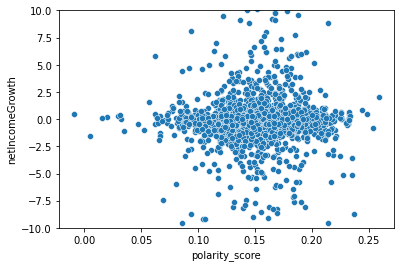

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=result, x='polarity_score', y='netIncomeGrowth')
plt.ylim(-10,10)

(-3.0, 3.0)

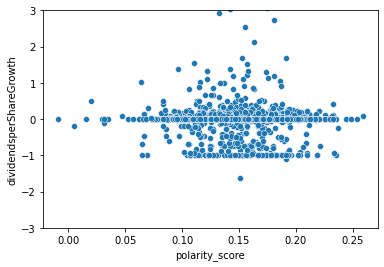

In [232]:
sns.scatterplot(data=result, x='polarity_score', y='dividendsperShareGrowth')
plt.ylim(-3,3)

In [281]:
# Doing all available ratios
ratio_temp = []
for i in ratio:
    for j in i:
        if j['date'].startswith('2020') or j['date'].startswith('2019'):
            ratio_temp.append(j)
        else:
            pass
ratio_full_temp = pd.DataFrame(ratio_temp)
ratio_full_temp['year']=ratio_full_temp['date'].apply(lambda x: x[0:4])
ratio_full_temp['code']=ratio_full_temp['symbol']+ratio_full_temp['year'].astype(str)
ratio_full_temp = ratio_full_temp.iloc[:,3:]
def growth(n):
    return (n>0).astype(int)  
ratio_full_temp.iloc[:,0:-2] = ratio_full_temp.iloc[:,0:-2].apply(growth)
result_temp = pd.merge(full, ratio_full_temp, how="outer", on=['code'])
result_temp.dropna(inplace=True)
result_temp

,code,content,content_clean,senti_score,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,...,fiveYDividendperShareGrowthPerShare,threeYDividendperShareGrowthPerShare,receivablesGrowth,inventoryGrowth,assetGrowth,bookValueperShareGrowth,debtGrowth,rdexpenseGrowth,sgaexpensesGrowth,year
0,CMCSA2019,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2019
1,CMCSA2020,"Operator: Good morning, ladies and gentlemen, ...","Operator,Good,morning,lady,gentleman,welcome,C...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2020
2,INTC2019,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2019
3,INTC2020,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2020
4,MU2019,"Operator: Good afternoon. My name is Sherry, a...","Operator,Good,afternoon,name,Sherry,conference...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,CNXC2020,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2020
2248,PLBY2020,Operator: Thank you for standing by. And welco...,"Operator,Thank,standing,welcome,Fourth,Quarter...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2020
2249,CLOV2020,"Operator: Ladies and gentlemen, thank you for ...","Operator,Ladies,gentleman,thank,standing,welco...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020
2250,AXON2020,"Andrea James: Hello, everyone. Welcome to Axon...","Andrea,James,Hello,everyone,Welcome,Axon,'s,Fo...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2020


In [290]:
# --- Find accuracy score for all growth rate

scores = {}

def logistic(n):
    X = result_temp['content_clean']
    y = result_temp[n]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    cv = CountVectorizer()
    X_train = cv.fit_transform(X_train)
    X_test = cv.transform(X_test)
    grid = GridSearchCV(lgr, param_grid={'max_iter': [100, 200, 300, 400, 500]})
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    s = accuracy_score(y_test, y_pred)
    scores[n] = s
    print(f'Accuracy score for {n} is {s}.')
    
rate_list = list(ratio[0][0].keys())[3:]
for i in rate_list:
    logistic(i)
df = pd.DataFrame.from_dict(scores, orient = 'index', columns = ['score'])
df.sort_values(by='score', ascending=False)

Accuracy score for revenueGrowth is 0.6576576576576577.
Accuracy score for grossProfitGrowth is 0.7319819819819819.
Accuracy score for ebitgrowth is 0.5968468468468469.
Accuracy score for operatingIncomeGrowth is 0.5968468468468469.
Accuracy score for netIncomeGrowth is 0.5472972972972973.
Accuracy score for epsgrowth is 0.5022522522522522.
Accuracy score for epsdilutedGrowth is 0.5022522522522522.
Accuracy score for weightedAverageSharesGrowth is 0.6103603603603603.
Accuracy score for weightedAverageSharesDilutedGrowth is 0.6193693693693694.
Accuracy score for dividendsperShareGrowth is 0.777027027027027.
Accuracy score for operatingCashFlowGrowth is 0.5292792792792793.
Accuracy score for freeCashFlowGrowth is 0.5225225225225225.
Accuracy score for tenYRevenueGrowthPerShare is 0.7792792792792793.
Accuracy score for fiveYRevenueGrowthPerShare is 0.7972972972972973.
Accuracy score for threeYRevenueGrowthPerShare is 0.7184684684684685.
Accuracy score for tenYOperatingCFGrowthPerShare is 

In [304]:
df = pd.DataFrame.from_dict(scores, orient = 'index', columns = ['score'])
df.sort_values(by='score', ascending=False)

,score
rdexpenseGrowth,0.835586
tenYDividendperShareGrowthPerShare,0.835586
fiveYDividendperShareGrowthPerShare,0.813063
threeYDividendperShareGrowthPerShare,0.804054
fiveYRevenueGrowthPerShare,0.797297
tenYRevenueGrowthPerShare,0.779279
dividendsperShareGrowth,0.777027
inventoryGrowth,0.745495
grossProfitGrowth,0.731982
tenYShareholdersEquityGrowthPerShare,0.731982
